<a href="https://colab.research.google.com/github/daisydq74/MATH-4640/blob/main/4640_Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import NumPy
import numpy as np

# define matrix A and vector b
A = np.array([[6, 4],
              [3, 2]])

n = len(A)

# set the diagonals of L to be 1 and other entries 0
L = [[0.0] * n for _ in range(n)]
for i in range(n):
    L[i][i] = 1.0

# set U = A
U = np.array([[6.0, 4.0],
              [3.0, 2.0]])

# determine L and U
for i in range(n):
    for j in range(i):
        L[i][j] = U[i][j] / U[j][j]
        for k in range(n):
          U[i][k] -= L[i][j] * U[j][k]

# Print the LU factors
print("L is: ", L)

print("\nU is: ", U)


L is:  [[1.0, 0.0], [0.5, 1.0]]

U is:  [[6. 4.]
 [0. 0.]]


In [ ]:
# (a)
# define a function to find the machine epsilon of Python
def estimate_m_epsilon():
    # start with 1.0
    m_epsilon = 1.0
    while (1.0 + 0.5 * m_epsilon) != 1.0:
        # keep deviding epsilon by half until we get 1+epsilon=1
        m_epsilon *= 0.5
    return m_epsilon

m_epsilon = estimate_m_epsilon()
print(m_epsilon)
print(1 + 0.5 * m_epsilon) # expected to get 1

# (b)
a = 1e16
b = 1
c = m_epsilon

print((a + b) + c)
print(a + (b + c))

2.220446049250313e-16
1.0
1e+16
1.0000000000000002e+16


In [ ]:
# use thomas algorithm to solve tridiagonal matrix
def thomas_algorithm(a, b, c, d):
    n = len(d)
    x  = [0] * n

    # create new coefficients and initialize them
    c_ = [0] * (n-1)
    d_ = [0] * n
    c_[0] = c[0] / b[0]
    d_[0] = d[0] / b[0]

    for i in range(1, n):
        temp = (b[i] - a[i - 1] * c_[i - 1])
        if i < n - 1:
            c_[i] = c[i] / temp
        d_[i] = (d[i] - a[i - 1] * d_[i - 1]) / temp

    # use back substitution to obtain solution
    x[-1] = d_[-1]

    for i in range(n-2, -1, -1):
        x[i] = d_[i] - c_[i] * x[i + 1]

    return x

# define diagonals of matrix A
main_diag = [6, 4, 4, 6]
sub_diag  = [2, 1, 1]
super_diag= [1, 1, 2]
b = [8, 13, 22, 27]

# solve using the defined function
x = thomas_algorithm(sub_diag, main_diag, super_diag, b)
print(x)


[1.0, 2.0, 3.0, 4.0]


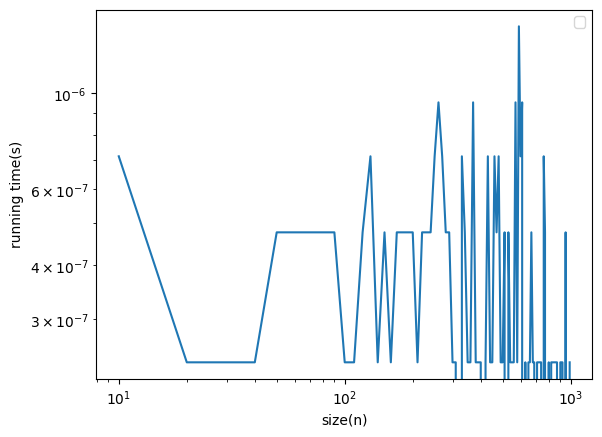

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# generate random tridiagonal matrix A and vector b of size n*n and n*1
def generate_random_tridiagonal(n):
    main_diag = np.random.rand(n)
    sub_diag = np.random.rand(n-1)
    super_diag = np.random.rand(n-1)
    b = np.random.rand(n)
    return sub_diag, main_diag, super_diag, b

sizes = list(range(10, 1000, 10))
times = []

# find running time for each n
for n in sizes:
    # generate random matrix and b
    sub_diag, main_diag, super_diag, b = generate_random_tridiagonal(n)
    x = thomas_algorithm(sub_diag, main_diag, super_diag, b)

    # calculate running time
    start_time = time.time()
    end_time = time.time()
    times.append(end_time - start_time)

# create a log-log plot
plt.loglog(sizes, times)
plt.xlabel('size(n)')
plt.ylabel('running time(s)')
plt.legend()
plt.show()
